## Welcome to sklearn

In [2]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [4]:
X,Y = load_boston(return_X_y=True)

In [5]:
TrainX, TestX, TrainY, TestY = train_test_split(X,Y,test_size=0.25)

In [6]:
Trees = RandomForestRegressor()

In [9]:
Operation = GridSearchCV(estimator=Trees,
                         n_jobs=-1,
                         cv=5,
                         param_grid={'n_estimators':[10,100,500],
                                          'max_features':[0.1,0.25,0.75,1]},
                         verbose=True)

In [10]:
Operation.fit(TrainX,TrainY)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 500], 'max_features': [0.1, 0.25, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [11]:
Operation.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
Operation.best_score_

0.8379904625727707

In [13]:
myModel = Operation.best_estimator_

In [14]:
myModel.score(TestX,TestY)

0.8998243151069071

In [15]:
import matplotlib.pyplot as plt

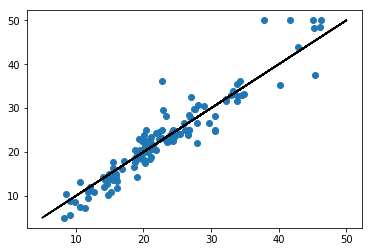

In [17]:
plt.scatter(myModel.predict(TestX),TestY)
plt.plot(TestY,TestY,'-k')